In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('mbti_1.csv')

# removing URLs from the posts column
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['posts'] = df['posts'].apply(remove_urls)

# combine all posts for each user into one string
df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)

# remove extra spaces, numbers, and special characters
df['posts'] = df['posts'].str.lower()
df['posts'] = df['posts'].str.replace('[^a-z\s]', '', regex=True)
df['posts'] = df['posts'].str.strip()

print("--- Data Cleaning Complete ---")

# create four new columns for each MBTI dichotomy
df['I-E'] = df['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
df['N-S'] = df['type'].apply(lambda x: 0 if x[1] == 'N' else 1)
df['T-F'] = df['type'].apply(lambda x: 0 if x[2] == 'T' else 1)
df['J-P'] = df['type'].apply(lambda x: 0 if x[3] == 'J' else 1)

print("--- Binary Labels Created ---")
print("First 5 rows of the dataframe with new labels:")
print(df[['type', 'I-E', 'N-S', 'T-F', 'J-P']].head())

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['posts'])
y_ie = df['I-E']
y_ns = df['N-S']
y_tf = df['T-F']
y_jp = df['J-P']

print(f"\nShape of the TF-IDF matrix (features): {X.shape}")

# training and testing sets
X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y_ns, test_size=0.2, random_state=42)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y_tf, test_size=0.2, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X, y_jp, test_size=0.2, random_state=42)

print("\n--- Data Splitting Complete ---")
print(f"I-E Training set size: {X_train_ie.shape[0]}, Testing set size: {X_test_ie.shape[0]}")
print(f"N-S Training set size: {X_train_ns.shape[0]}, Testing set size: {X_test_ns.shape[0]}")
print(f"T-F Training set size: {X_train_tf.shape[0]}, Testing set size: {X_test_tf.shape[0]}")
print(f"J-P Training set size: {X_train_jp.shape[0]}, Testing set size: {X_test_jp.shape[0]}")



<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\|'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3110666447.py:17: SyntaxWarning: invalid escape sequence '\|'
  df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)
/tmp/ipython-input-3110666447.py:21: SyntaxWarning: invalid escape sequence '\s'
  df['posts'] = df['posts'].str.replace('[^a-z\s]', '', regex=True)


--- Data Cleaning Complete ---
--- Binary Labels Created ---
First 5 rows of the dataframe with new labels:
   type  I-E  N-S  T-F  J-P
0  INFJ    0    0    1    0
1  ENTP    1    0    0    1
2  INTP    0    0    0    1
3  INTJ    0    0    0    0
4  ENTJ    1    0    0    0

Shape of the TF-IDF matrix (features): (8675, 5000)

--- Data Splitting Complete ---
I-E Training set size: 6940, Testing set size: 1735
N-S Training set size: 6940, Testing set size: 1735
T-F Training set size: 6940, Testing set size: 1735
J-P Training set size: 6940, Testing set size: 1735


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('mbti_1.csv')
df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)
df['posts'] = df['posts'].str.lower().str.replace('[^a-z\s]', '', regex=True).str.strip()
df['I-E'] = df['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
df['N-S'] = df['type'].apply(lambda x: 0 if x[1] == 'N' else 1)
df['T-F'] = df['type'].apply(lambda x: 0 if x[2] == 'T' else 1)
df['J-P'] = df['type'].apply(lambda x: 0 if x[3] == 'J' else 1)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['posts'])
y_ie = df['I-E']
y_ns = df['N-S']
y_tf = df['T-F']
y_jp = df['J-P']
X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y_ns, test_size=0.2, random_state=42)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y_tf, test_size=0.2, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X, y_jp, test_size=0.2, random_state=42)


print("--- Training Models ---")
model_ie = LogisticRegression(solver='liblinear')
model_ns = LogisticRegression(solver='liblinear')
model_tf = LogisticRegression(solver='liblinear')
model_jp = LogisticRegression(solver='liblinear')

print("Training I-E model...")
model_ie.fit(X_train_ie, y_train_ie)
print("Training N-S model...")
model_ns.fit(X_train_ns, y_train_ns)
print("Training T-F model...")
model_tf.fit(X_train_tf, y_train_tf)
print("Training J-P model...")
model_jp.fit(X_train_jp, y_train_jp)

print("\n--- Model Training Complete ---")

print("\n--- Evaluating Models ---")

# I-E model evaluation
y_pred_ie = model_ie.predict(X_test_ie)
print("\nI-E Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_ie, y_pred_ie):.4f}")
print("Classification Report:")
print(classification_report(y_test_ie, y_pred_ie, target_names=['Introvert', 'Extrovert']))

# N-S model evaluation
y_pred_ns = model_ns.predict(X_test_ns)
print("\nN-S Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_ns, y_pred_ns):.4f}")
print("Classification Report:")
print(classification_report(y_test_ns, y_pred_ns, target_names=['Intuition', 'Sensing']))

# T-F model evaluation
y_pred_tf = model_tf.predict(X_test_tf)
print("\nT-F Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_tf, y_pred_tf):.4f}")
print("Classification Report:")
print(classification_report(y_test_tf, y_pred_tf, target_names=['Thinking', 'Feeling']))

# J-P model evaluation
y_pred_jp = model_jp.predict(X_test_jp)
print("\nJ-P Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_jp, y_pred_jp):.4f}")
print("Classification Report:")
print(classification_report(y_test_jp, y_pred_jp, target_names=['Judging', 'Perceiving']))


<>:10: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4130769247.py:10: SyntaxWarning: invalid escape sequence '\|'
  df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)
/tmp/ipython-input-4130769247.py:11: SyntaxWarning: invalid escape sequence '\s'
  df['posts'] = df['posts'].str.lower().str.replace('[^a-z\s]', '', regex=True).str.strip()


--- Training Models ---
Training I-E model...
Training N-S model...
Training T-F model...
Training J-P model...

--- Model Training Complete ---

--- Evaluating Models ---

I-E Model Performance:
Accuracy: 0.8467
Classification Report:
              precision    recall  f1-score   support

   Introvert       0.85      0.97      0.91      1353
   Extrovert       0.80      0.41      0.54       382

    accuracy                           0.85      1735
   macro avg       0.82      0.69      0.72      1735
weighted avg       0.84      0.85      0.83      1735


N-S Model Performance:
Accuracy: 0.8841
Classification Report:
              precision    recall  f1-score   support

   Intuition       0.88      1.00      0.94      1489
     Sensing       0.89      0.21      0.34       246

    accuracy                           0.88      1735
   macro avg       0.89      0.60      0.64      1735
weighted avg       0.89      0.88      0.85      1735


T-F Model Performance:
Accuracy: 0.8530
Class

<>:13: SyntaxWarning: invalid escape sequence '\|'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\|'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4043049521.py:13: SyntaxWarning: invalid escape sequence '\|'
  df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)
/tmp/ipython-input-4043049521.py:14: SyntaxWarning: invalid escape sequence '\s'
  df['posts'] = df['posts'].str.lower().str.replace('[^a-z\s]', '', regex=True).str.strip()


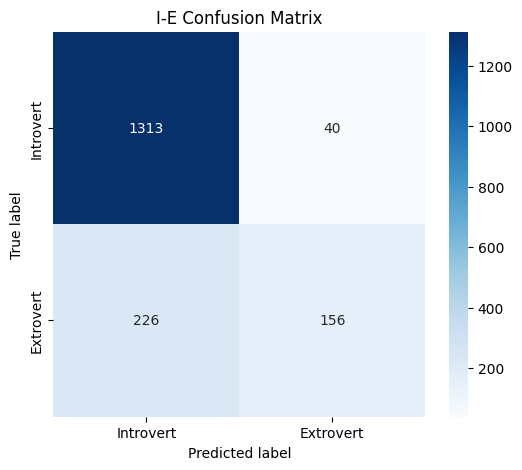

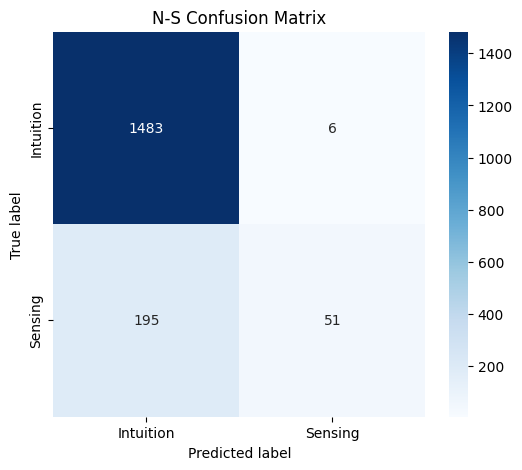

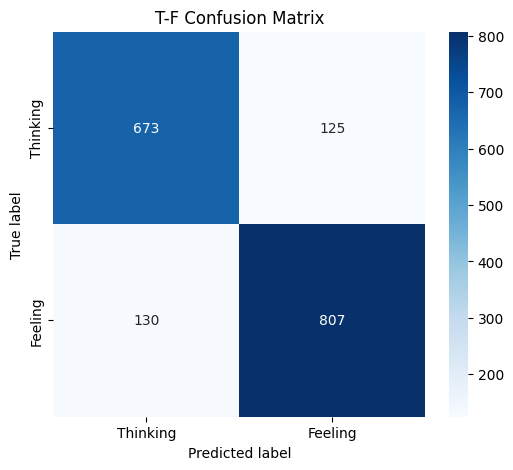

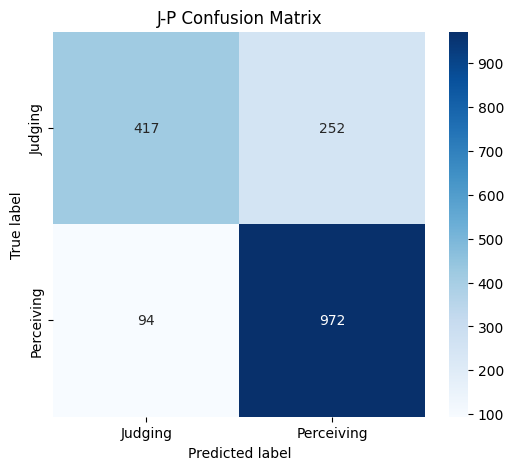


Example Prediction for a new text:
Input: 'I love to analyze things and find logical solutions. I enjoy debating topics and thinking about the future.'
Predicted MBTI Type: INTP

Models and vectorizer saved as .pkl files (commented out by default).


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

df = pd.read_csv('mbti_1.csv')
df['posts'] = df['posts'].str.replace('\|\|\|', ' ', regex=True)
df['posts'] = df['posts'].str.lower().str.replace('[^a-z\s]', '', regex=True).str.strip()
df['I-E'] = df['type'].apply(lambda x: 0 if x[0] == 'I' else 1)
df['N-S'] = df['type'].apply(lambda x: 0 if x[1] == 'N' else 1)
df['T-F'] = df['type'].apply(lambda x: 0 if x[2] == 'T' else 1)
df['J-P'] = df['type'].apply(lambda x: 0 if x[3] == 'J' else 1)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['posts'])
y_ie = df['I-E']
y_ns = df['N-S']
y_tf = df['T-F']
y_jp = df['J-P']

X_train_ie, X_test_ie, y_train_ie, y_test_ie = train_test_split(X, y_ie, test_size=0.2, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y_ns, test_size=0.2, random_state=42)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y_tf, test_size=0.2, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X, y_jp, test_size=0.2, random_state=42)

model_ie = LogisticRegression(solver='liblinear').fit(X_train_ie, y_train_ie)
model_ns = LogisticRegression(solver='liblinear').fit(X_train_ns, y_train_ns)
model_tf = LogisticRegression(solver='liblinear').fit(X_train_tf, y_train_tf)
model_jp = LogisticRegression(solver='liblinear').fit(X_train_jp, y_train_jp)

def predict_mbti(text, vectorizer, models):
    text_processed = re.sub(r'https?://\S+|www\.\S+', '', text)
    text_processed = re.sub(r'[^a-z\s]', '', text_processed.lower().strip())

    text_vector = vectorizer.transform([text_processed])

    pred_ie = models['ie'].predict(text_vector)[0]
    pred_ns = models['ns'].predict(text_vector)[0]
    pred_tf = models['tf'].predict(text_vector)[0]
    pred_jp = models['jp'].predict(text_vector)[0]

    mbti_map = {
        'ie': {0: 'I', 1: 'E'},
        'ns': {0: 'N', 1: 'S'},
        'tf': {0: 'T', 1: 'F'},
        'jp': {0: 'J', 1: 'P'}
    }

    predicted_type = (
        mbti_map['ie'][pred_ie] +
        mbti_map['ns'][pred_ns] +
        mbti_map['tf'][pred_tf] +
        mbti_map['jp'][pred_jp]
    )

    return predicted_type

def plot_confusion_matrix(y_true, y_pred, labels, title):
    """Plots a confusion matrix using seaborn."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_pred_ie = model_ie.predict(X_test_ie)
y_pred_ns = model_ns.predict(X_test_ns)
y_pred_tf = model_tf.predict(X_test_tf)
y_pred_jp = model_jp.predict(X_test_jp)

plot_confusion_matrix(y_test_ie, y_pred_ie, ['Introvert', 'Extrovert'], 'I-E Confusion Matrix')
plot_confusion_matrix(y_test_ns, y_pred_ns, ['Intuition', 'Sensing'], 'N-S Confusion Matrix')
plot_confusion_matrix(y_test_tf, y_pred_tf, ['Thinking', 'Feeling'], 'T-F Confusion Matrix')
plot_confusion_matrix(y_test_jp, y_pred_jp, ['Judging', 'Perceiving'], 'J-P Confusion Matrix')

models = {
    'ie': model_ie,
    'ns': model_ns,
    'tf': model_tf,
    'jp': model_jp
}
my_text = "I love to analyze things and find logical solutions. I enjoy debating topics and thinking about the future."
predicted_type = predict_mbti(my_text, tfidf, models)
print(f"\nExample Prediction for a new text:\nInput: '{my_text}'")
print(f"Predicted MBTI Type: {predicted_type}")

joblib.dump(model_ie, 'model_ie.pkl')
joblib.dump(model_ns, 'model_ns.pkl')
joblib.dump(model_tf, 'model_tf.pkl')
joblib.dump(model_jp, 'model_jp.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("\nModels and vectorizer saved as .pkl files (commented out by default).")



In [3]:
import re
import numpy as np
import pandas as pd
import joblib

try:
    model_ie = joblib.load('model_ie.pkl')
    model_ns = joblib.load('model_ns.pkl')
    model_tf = joblib.load('model_tf.pkl')
    model_jp = joblib.load('model_jp.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')

    models = {
        'ie': model_ie,
        'ns': model_ns,
        'tf': model_tf,
        'jp': model_jp
    }
    print("Models and vectorizer loaded successfully.")
except FileNotFoundError:
    print("Error: Model files not found. Please ensure you have run the previous step and saved the models.")
    exit()

def predict_mbti(text, vectorizer, models):
    """
    Predicts a full 4-letter MBTI type from a single string of text.
    """
    text_processed = re.sub(r'https?://\S+|www\.\S+', '', text)
    text_processed = re.sub(r'[^a-z\s]', '', text_processed.lower().strip())

    text_vector = vectorizer.transform([text_processed])

    pred_ie = models['ie'].predict(text_vector)[0]
    pred_ns = models['ns'].predict(text_vector)[0]
    pred_tf = models['tf'].predict(text_vector)[0]
    pred_jp = models['jp'].predict(text_vector)[0]

    mbti_map = {
        'ie': {0: 'I', 1: 'E'},
        'ns': {0: 'N', 1: 'S'},
        'tf': {0: 'T', 1: 'F'},
        'jp': {0: 'J', 1: 'P'}
    }

    predicted_type = (
        mbti_map['ie'][pred_ie] +
        mbti_map['ns'][pred_ns] +
        mbti_map['tf'][pred_tf] +
        mbti_map['jp'][pred_jp]
    )

    return predicted_type

new_data = {
    'user_id': [1, 2, 3, 4, 5],
    'text': [
        "I'm a very logical person who likes to plan everything in advance. I find comfort in clear rules and systems.",
        "I love spending time with friends and meeting new people. I'm always looking for a new adventure and don't like to be tied down.",
        "I enjoy thinking deeply about abstract concepts and the meaning behind things. I'm very empathetic and often find myself helping others.",
        "I'm a very practical and detail-oriented person. I prefer to deal with facts and reality rather than theoretical ideas.",
        "I'm an ambitious and strategic thinker. I love leading teams and am always focused on the big picture to achieve our goals."
    ]
}
new_df = pd.DataFrame(new_data)

new_df['predicted_mbti'] = new_df['text'].apply(lambda x: predict_mbti(x, tfidf, models))

career_suggestions = {
    'ISTJ': 'Accountant, Auditor, Financial Officer',
    'ISFJ': 'Teacher, Social Worker, Nurse',
    'INFJ': 'Counselor, Psychologist, Writer',
    'INTJ': 'Scientist, Engineer, Architect',
    'ISTP': 'Mechanic, Pilot, Engineer',
    'ISFP': 'Artist, Musician, Designer',
    'INFP': 'Therapist, Graphic Designer, Human Resources',
    'INTP': 'Software Developer, Data Scientist, Researcher',
    'ESTP': 'Sales Manager, Entrepreneur, Marketing Consultant',
    'ESFP': 'Performer, Event Planner, Childcare Provider',
    'ENFP': 'Journalist, Consultant, Public Relations',
    'ENTP': 'Entrepreneur, Lawyer, Urban Planner',
    'ESTJ': 'Manager, Judge, Project Manager',
    'ESFJ': 'Sales Representative, Flight Attendant, Recruiter',
    'ENFJ': 'Manager, Teacher, Social Worker',
    'ENTJ': 'CEO, Executive, University President'
}

new_df['career_suggestion'] = new_df['predicted_mbti'].map(career_suggestions)

output_filename = 'predicted_mbti_data.csv'
new_df.to_csv(output_filename, index=False)

print(f"\nFinal dataset '{output_filename}'")
print("\nFinal DataFrame:")
print(new_df)


Models and vectorizer loaded successfully.

Final dataset 'predicted_mbti_data.csv'

Final DataFrame:
   user_id                                               text predicted_mbti  \
0        1  I'm a very logical person who likes to plan ev...           INTJ   
1        2  I love spending time with friends and meeting ...           INFP   
2        3  I enjoy thinking deeply about abstract concept...           INTP   
3        4  I'm a very practical and detail-oriented perso...           INTP   
4        5  I'm an ambitious and strategic thinker. I love...           INTP   

                                career_suggestion  
0                  Scientist, Engineer, Architect  
1    Therapist, Graphic Designer, Human Resources  
2  Software Developer, Data Scientist, Researcher  
3  Software Developer, Data Scientist, Researcher  
4  Software Developer, Data Scientist, Researcher  
